In [1]:
import cv2
img_predict = cv2.imread('dataset/images/56.jpg') 

In [2]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")

In [3]:
result = model.predict(source=img_predict, conf=0.5) # %50 altındaki güven skoruna sahip tahminleri dikkate alma.


0: 640x384 1 plaka, 100.5ms
Speed: 6.6ms preprocess, 100.5ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 384)


In [4]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9856])
data: tensor([[8.4353e+02, 1.6098e+03, 1.3109e+03, 1.7148e+03, 9.8562e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (4165, 2343)
shape: torch.Size([1, 6])
xywh: tensor([[1077.2279, 1662.3135,  467.3876,  104.9965]])
xywhn: tensor([[0.4598, 0.3991, 0.1995, 0.0252]])
xyxy: tensor([[ 843.5341, 1609.8152, 1310.9218, 1714.8116]])
xyxyn: tensor([[0.3600, 0.3865, 0.5595, 0.4117]])

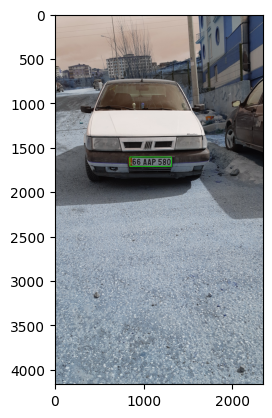

In [5]:
import matplotlib.pyplot as plt

img2 = img_predict.copy()

for box in result[0].boxes:
    x1, y1, x2, y2= map(int, box.xyxy[0])

    cv2.rectangle(img2, (x1,y1), (x2,y2), color=(0,255,0), thickness=5)

plt.imshow(img2)
plt.show()

In [6]:
import easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Bulunan metin: TR


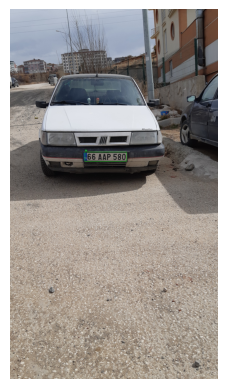

In [9]:

# EasyOCR reader'ı oluştur
reader = easyocr.Reader(['en', 'tr'])

img2 = img_predict.copy()

for box in result[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Kutu içini kırp
    cropped = img2[y1:y2, x1:x2]

    # OCR işlemi yap
    ocr_result = reader.readtext(cropped)
    
    # OCR sonucu varsa ilk metni al
    text = ocr_result[0][1] if ocr_result else ""
    print(f"Bulunan metin: {text}")

    # Görüntü üzerine kutu ve metni çiz
    cv2.rectangle(img2, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    cv2.putText(img2, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                0.6, (36, 255, 12), 2)

# RGB formatına çevir (matplotlib için)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis("off")
plt.show()
